🛰️ Hands-On: Do Raw Data ao Céu — Classificação de Objetos Astronômicos com Machine Learning

# 1 Imports

In [1]:
# Importa a biblioteca pandas, usada para manipulação e análise de dados.
import pandas as pd

# Importa a biblioteca numpy, usada para manipulação de arrays e operações numéricas.
import numpy as np

# Importa a biblioteca pyplot do matplotlib, usada para criar gráficos.
from matplotlib import pyplot as plt

# Importa a biblioteca seaborn, que é uma extensão do matplotlib para criar gráficos mais atraentes e informativos.
import seaborn as sns

# tratamento de outliers atras de um modelo
from sklearn.neighbors import LocalOutlierFactor

# Importando a biblioteca math para funções matemáticas.
import math

# biblioteca para ajudar e formar a curva ROC
from sklearn.preprocessing import label_binarize

#biliotecas ultilizadas para o balanceamento dos valores target para amplificar acuracia
from imblearn.over_sampling import SMOTE
from collections import Counter

#import cross validation
from sklearn.model_selection import cross_val_score

#import os para detecção de path do colab
import os
# Importa a função train_test_split para dividir os dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split

# Importa a biblioteca preprocessing para utilizar o MinMaxScaler e StandardScaler, usados para normalização e padronização de dados.
from sklearn.preprocessing import StandardScaler

# Importa o category_encoders, que fornece várias técnicas para codificação de variáveis categóricas.
import category_encoders as ce

# Importa a biblioteca Pipeline para construir fluxos de trabalho de machine learning com pré-processamento e modelos.
from sklearn.pipeline import Pipeline

# Importa a classe LogisticRegression para aplicar a regressão logística.
from sklearn.linear_model import LogisticRegression

# Importa a classe RandomForestClassifier para aplicar a classificação usando Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Importa a classe DecisionTreeClassifier para aplicar a classificação usando árvore de decisão.
from sklearn.tree import DecisionTreeClassifier

# Importa as métricas roc_auc_score, confusion_matrix e classification_report para avaliar o desempenho do modelo.
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, auc


#cross validação
from sklearn.model_selection import cross_val_predict

# Importar biblioteca do kaggle para fluxo de automação
import kagglehub

#Imports para a implementação
from PIL import Image
import requests
from io import BytesIO
import ipywidgets as widgets
from IPython.display import display, clear_output

# biblioteca para ajudar a plotar curva ROC
from itertools import cycle

# Importa o GridSearchCV para realizar a busca em grade de hiperparâmetros para o modelo.
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importa a biblioteca _pickle para serialização e desserialização de objetos.
import _pickle as cPickle

# Importa joblib, usado para salvar e carregar modelos de forma eficiente.
import joblib

# Importa a biblioteca de warnings para controlar a exibição de mensagens de aviso.
import warnings

# Ignora todas as mensagens de aviso, evitando que apareçam no terminal durante a execução do código.
warnings.filterwarnings("ignore")

# Configurações do pandas para melhor visualização dos dados:

# Exibe todo o conteúdo da célula, sem truncamento.
pd.set_option('display.max_colwidth', None)

# Evita que quebre a linha automaticamente ao exibir dataframes grandes.
pd.set_option('display.expand_frame_repr', False)

# Aumenta a largura do display para acomodar mais informações.
pd.set_option('display.width', 300)


#🔍 Sobre os Dados
- Breve explicação sobre o Sloan Digital Sky Survey (SDSS)

- Quantas amostras, que tipo de observações, etc

In [2]:


df = pd.read_csv("star_classification.csv")

df.head(5)


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
df.head(20)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [4]:
df["class"].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [5]:
print( 'Número de instâncias do dataset : {}'.format( df.shape[0] ) )
print( 'Número de atributos do dataset: {}'.format( df.shape[1] ) )

Número de instâncias do dataset : 100000
Número de atributos do dataset: 18


In [6]:
dict_df = {
    "obj_ID": (
        "Identificador único do objeto observado no catálogo de imagens (CAS).",
        "valor numérico grande (ex: 1.237661e+18)"
    ),
    "alpha": (
        "Ascensão reta do objeto celeste na época J2000.",
        "valores em graus (0 a 360)"
    ),
    "delta": (
        "Declinação do objeto celeste na época J2000.",
        "valores em graus (-90 a +90)"
    ),
    "u": (
        "Magnitude aparente no filtro ultravioleta (SDSS u-band).",
        "valores: número decimal, menor valor = mais brilho"
    ),
    "g": (
        "Magnitude aparente no filtro verde-azulado (SDSS g-band).",
        "valores: número decimal"
    ),
    "r": (
        "Magnitude aparente no filtro vermelho (SDSS r-band).",
        "valores: número decimal"
    ),
    "i": (
        "Magnitude aparente no filtro infravermelho próximo (SDSS i-band).",
        "valores: número decimal"
    ),
    "z": (
        "Magnitude aparente no filtro infravermelho profundo (SDSS z-band).",
        "valores: número decimal"
    ),
    "run_ID": (
        "Número do 'run' do telescópio (varredura).",
        "valor inteiro identificando a coleta"
    ),
    "rereun_ID": (
        "Número da reprocessamento da imagem (rerun).",
        "valor inteiro representando o tipo de processamento"
    ),
    "cam_col": (
        "Coluna da câmera que capturou o dado.",
        "valores inteiros (1 a 6)"
    ),
    "field_ID": (
        "Identificador do campo dentro do run.",
        "valor inteiro"
    ),
    "spec_obj_ID": (
        "ID único do objeto espectroscópico.",
        "valor numérico grande; objetos com mesmo ID compartilham a mesma classe"
    ),
    "class": (
        "Classe do objeto astronômico observado.",
        "valores possíveis: 'STAR', 'GALAXY', 'QSO'"
    ),
    "redshift": (
        "Valor de desvio para o vermelho baseado no espectro.",
        "valores: número decimal (ex: 0.63479); maiores indicam objetos mais distantes"
    ),
    "plate": (
        "Identificador da placa usada na coleta espectroscópica.",
        "valor inteiro"
    ),
    "MJD": (
        "Data Juliana Modificada da observação.",
        "valor inteiro representando a data"
    ),
    "fiber_ID": (
        "Identificador da fibra que captou a luz na observação.",
        "valor inteiro"
    )
}


# Criação de um DataFrame a partir do dicionário, onde "items()" converte as chaves e valores do dicionário em pares
dict_df = pd.DataFrame(dict_df.items(), columns=["Variável", "Info"])

# Separação da coluna "Info" em duas colunas: "Descrição" (primeiro valor da tupla) e "Categorias" (segundo valor da tupla)
dict_df["Descrição"] = dict_df["Info"].apply(lambda x: x[0])
dict_df["Categorias"] = dict_df["Info"].apply(lambda x: x[1])

# Adição de uma nova coluna "Tipo" para indicar o tipo de variável (Numérica ou Categórica)
dict_df["Tipo"] = dict_df["Variável"].apply(lambda x: "Categórica" if x in [
    "class","run_ID", "rereun_ID ", "cam_col", "field_ID", "plate", "MJD", "fiber_ID", "obj_ID", "spec_obj_ID"
] else "Numérica")

# Remoção da coluna auxiliar "Info" que não será mais necessária
dict_df.drop(columns=["Info"], inplace=True)

display(dict_df)

,Variável,Descrição,Categorias,Tipo
0,obj_ID,Identificador único do objeto observado no catálogo de imagens (CAS).,valor numérico grande (ex: 1.237661e+18),Categórica
1,alpha,Ascensão reta do objeto celeste na época J2000.,valores em graus (0 a 360),Numérica
2,delta,Declinação do objeto celeste na época J2000.,valores em graus (-90 a +90),Numérica
3,u,Magnitude aparente no filtro ultravioleta (SDSS u-band).,"valores: número decimal, menor valor = mais brilho",Numérica
4,g,Magnitude aparente no filtro verde-azulado (SDSS g-band).,valores: número decimal,Numérica
5,r,Magnitude aparente no filtro vermelho (SDSS r-band).,valores: número decimal,Numérica
6,i,Magnitude aparente no filtro infravermelho próximo (SDSS i-band).,valores: número decimal,Numérica
7,z,Magnitude aparente no filtro infravermelho profundo (SDSS z-band).,valores: número decimal,Numérica
8,run_ID,Número do 'run' do telescópio (varredura).,valor inteiro identificando a coleta,Categórica
9,rereun_ID,Número da reprocessamento da imagem (rerun).,valor inteiro representando o tipo de processamento,Numérica


## **Metodologia CRISP-DM**
<a id="metodologia-crisp-dm"></a>

O “Cross Industry Standard Process for Data Mining [CRISP-DM]” trata-se de um modelo de processo, com seis etapas Shearer (2000), ilustrado na Figura 1. Está sendo amplamente utilizada para ajudar a planejar e desenvolver projetos de ciência de dados.

### **Compreensão do Negócio**
<a id="compreensao-do-negocio"></a>

# 🌌 Classificação de Objetos Astronômicos com Dados do SDSS

## 🚀 Contextualização do Problema de Negócio

A astronomia moderna está em plena transformação com o crescimento exponencial de dados provenientes de observações espaciais. Instrumentos como o Sloan Digital Sky Survey (SDSS) coletam milhões de observações do céu, registrando características espectrais de objetos celestes.

Com esse volume massivo de dados, surge a necessidade de aplicar técnicas de **ciência de dados e machine learning** para automatizar a **classificação de objetos astronômicos**, como estrelas, galáxias e quasares.

Neste projeto, o objetivo é aplicar uma abordagem de modelagem de dados para classificar automaticamente objetos celestes, contribuindo para acelerar análises astrofísicas e fomentar aplicações científicas e tecnológicas (como navegação espacial, mapeamento cósmico, e até mesmo tecnologias derivadas para o setor privado).

---

## 🪐 Detalhes do Dataset

O conjunto de dados foi obtido a partir do **SDSS (Sloan Digital Sky Survey)** e contém informações espectroscópicas de cerca de **100.000 objetos celestes**. Cada linha representa uma observação única de um objeto, contendo **atributos fotométricos e posicionais**, além da classe do objeto (alvo da predição).

### 📄 Colunas principais:

| Coluna         | Descrição |
|----------------|-----------|
| `obj_ID`       | Identificador único do objeto |
| `alpha`        | Ascensão reta (posição no céu em graus) |
| `delta`        | Declinação (posição vertical no céu em graus) |
| `u, g, r, i, z`| Magnitudes aparentes nos filtros fotométricos do SDSS |
| `redshift`     | Medida de afastamento do objeto (indicador de distância) |
| `class`        | Classe do objeto: **GALAXY**, **STAR** ou **QSO (quasar)** |
| `run_ID`, `cam_col`, `plate`, etc. | Informações técnicas da observação (instrumentação) |

---
## Explicação das Variáveis

> 🔍 **Nota:** As variáveis `u`, `g`, `r`, `i`, `z` e `redshift` são essenciais na modelagem, pois representam as **características espectrais** e **posicionais** que distinguem os diferentes tipos de objetos astronômicos.


## Variável Alvo (Target/class)

*A variável **`class`** é a nossa variável alvo única:*

- *`GALAXY` = galaxia.*
- *`STAR` = estrela tanto estrelas grandes como gigantes.*
- * `QSO` = QSO tambem chamados de quasares


## 🎯 Objetivo do Projeto

Criar um modelo de classificação capaz de prever o tipo de objeto astronômico (`class`) com base em suas características espectrais e posicionais.

---

## 🛠️ Aplicações Potenciais

- Automatização da classificação em catálogos astronômicos
- Apoio à pesquisa científica e descobertas espaciais
- Transferência de conhecimento para aplicações com imagens complexas (ex: medicina, satélites, defesa)

---

> ✨ *“Ciência de dados ajudando a decifrar o cosmos — uma observação por vez.”*


* 02. Entendimento dos dados

 Analisar o dataset como dimensoes, formatos e dados faltantes. As tarefas realizadas foram: Dimensao dos Dados, Tipo dos Dados nas Colunas, Volume de Dados Faltantes NA's e análise exploratória de dados (EDA) do tipo univariada, bivariada e multivariada.


* 03. Preparação dos Dados

Preparar os dados brutos a fim de adequá-los para etapas de modelagem.


* 04. Modelagem


Implementacao de 2 modelos de Machine Learning utilizando os seguintes algoritmos:SMOTE, Random Forest.


* 05. Avaliação


 Uso das principais métricas de avaliação de modelos de aprendizado de máquina para uma tarefa de classificação: área abaixo da Curva ROC e as principais métricas da Matriz de Confusão


* 6 Aplicação
*🚀 SpaceDex – Uma Pokédex do Espaço

Para tornar nosso projeto mais interativo e educativo, criamos a **SpaceDex**, uma ferramenta inspirada na Pokédex, onde o usuário pode explorar amostras reais do nosso dataset astronômico.

* 🛠️ Como funciona:

- A cada clique no botão, uma **imagem real do céu** é carregada usando a API pública do SDSS, com base nas coordenadas (`alpha`, `delta`) do objeto sorteado.
- A imagem aparece sem a classificação, em um estilo “❓ Quem é esse objeto?”, permitindo tentar adivinhar o tipo.
- Um segundo botão revela a **classe real** e a **classe predita** pelo nosso modelo de machine learning, além de mostrar as **magnitudes u, g, r, i, z** e o valor de **redshift** daquele objeto.

* 🎯 Objetivo:

- **Visualizar exemplos reais** de galáxias, estrelas e quasares diretamente no céu.
- **Explorar como o modelo classifica** com base nas características espectrais.
- Tornar a análise mais intuitiva e acessível, conectando ciência de dados à astronomia visual.

> ✨ Esta abordagem transforma o projeto em uma ferramenta educativa, onde dados, modelo e imagens reais se combinam para explorar o universo de forma interativa.


### **Entendimento dos dados**
<a id="entendimento-dos-dados"></a>

Esta etapa consiste desde a captura dos dados até a identificação de problemas relacionados à qualidade. Nesta fase é também onde se formam hipóteses em cima do que se aprendeu com os dados.

In [7]:
df.head(10)


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


#### Análise Exploratória dos Dados - Insights Iniciais
<a id="analise-exploratoria-de-dados"></a>

O objetivo deste etapa é fazer dois tipos de explorações sob os dados:


* Enriquecer o conjunto de dados (dataset) com o levantamento de metadados como dimensão, tipos de atributos e medidas de resumo;

* Explorar analiticamente o dataset com o uso de estatística descritiva (medida de tendência central e de variabilidade), além de visualização dos dados  para se ter ideias de tipos de análises que podem ser realizadas. Como aqui se trata da primeira exploração de dados, a seguir serão definidas algumas propostas de análises com a finalidade de tornar os estudos mais bem direcionados.

In [8]:
print( 'Número de instâncias do dataset : {}'.format( df.shape[0] ) )
print( 'Número de atributos do dataset: {}'.format( df.shape[1] ) )

Número de instâncias do dataset : 100000
Número de atributos do dataset: 18


In [9]:
num_vars = df.select_dtypes(include=['number']).columns.tolist()

In [10]:
df[num_vars].describe(percentiles = [0.01,0.75, 0.99])

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
1%,1.237649e+18,2.172928,-9.224743,17.142674,15.829114,15.227630,14.918110,14.663328,756.000000,301.0,1.000000,16.000000,4.391793e+17,-0.000844,390.000000,51877.000000,10.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
99%,1.237680e+18,357.980799,65.142702,26.657341,24.637623,22.794967,22.158517,22.365484,8116.000000,301.0,6.000000,774.010000,1.273962e+19,3.127080,11315.000000,58485.000000,986.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


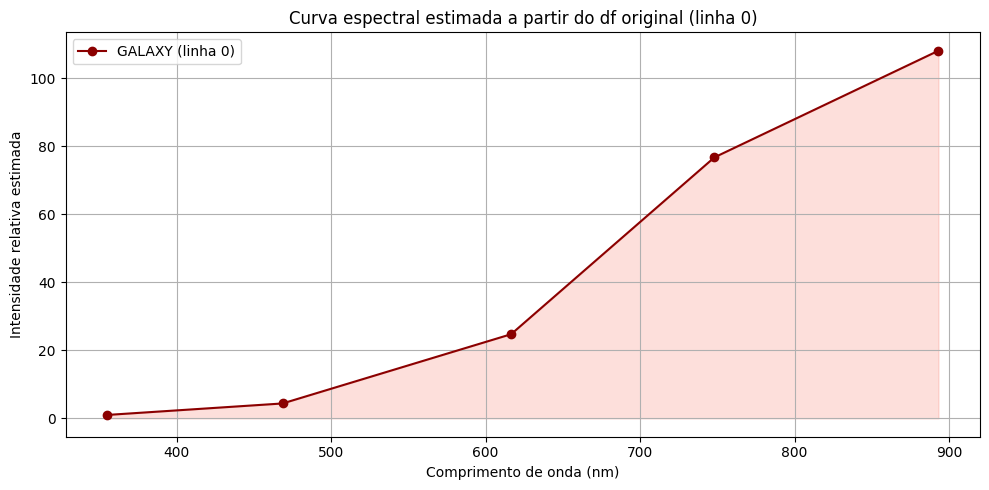

In [11]:
# Selecionar a linha 0 como pedido
obj = df.iloc[0]

# Filtros e seus comprimentos de onda centrais
wavelengths_nm = {'u': 355.1, 'g': 468.6, 'r': 616.5, 'i': 748.1, 'z': 893.1}
bands = ['u', 'g', 'r', 'i', 'z']
wavelengths = np.array([wavelengths_nm[band] for band in bands])
magnitudes = np.array([obj[band] for band in bands])

# Conversão para intensidade relativa
intensity = 10 ** ((-magnitudes + max(magnitudes)) / 2.5)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(wavelengths, intensity, marker='o', color='darkred', label=f'{obj["class"]} (linha 0)')
plt.fill_between(wavelengths, 0, intensity, alpha=0.25, color='salmon')

plt.xlabel('Comprimento de onda (nm)')
plt.ylabel('Intensidade relativa estimada')
plt.title('Curva espectral estimada a partir do df original (linha 0)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
df.shape

(100000, 18)

In [13]:
# verifica linhas duplicadas

df.duplicated().sum()

np.int64(0)

#### Análise e Insights

 - Não foram encontradas instâncias duplicadas no dataset

### train split

In [14]:
# criando a variável target sendo 1 para mau e 0 para bom que é o formato mais comum (1 para evento e 0 para não evento)
df = df.rename(columns={'class': 'target'})


df = df.rename(columns={'class': 'target'})
y = df['target'] # variável resposta
X = df
X = df.drop(columns=['target', 'obj_ID', 'run_ID', 'rerun_ID', 'cam_col',
                     'field_ID', 'spec_obj_ID', 'fiber_ID', 'alpha', 'delta', 'plate', 'MJD'])
X
X.shape, y.shape

((100000, 6), (100000,))

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

print("Número de observações do dataset de treino: ", len(X_train))
print("Número de observações do dataset de teste: ", len(X_test))
print("Total do número de observações do dataset: ", len(X_train)+len(X_test))


# print proportions
print('train: {}% | Test: {}%'.format( round(len(y_train)/len(y),2),
                                                        round(len(y_test)/len(y),2) ) )

Número de observações do dataset de treino:  70000
Número de observações do dataset de teste:  30000
Total do número de observações do dataset:  100000
train: 0.7% | Test: 0.3%


# Análise Exploratória dos Dados - Base de Treino
<a id="base-treino"></a>

In [16]:
df_treino = pd.concat([X_train,y_train], axis = 1)

In [17]:
df_treino.shape

(70000, 7)

In [18]:
df_treino.head(2)

,u,g,r,i,z,redshift,target
76165,23.35859,23.28948,21.88420,20.39185,19.79643,0.685543,GALAXY
25678,22.84459,22.25868,20.70906,19.69149,19.16006,0.581089,GALAXY


## Tipo de Variáveis
<a id="tipo-de-variaveis"></a>

In [19]:
pd.DataFrame.info(df_treino);

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 76165 to 10768
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   u         70000 non-null  float64
 1   g         70000 non-null  float64
 2   r         70000 non-null  float64
 3   i         70000 non-null  float64
 4   z         70000 non-null  float64
 5   redshift  70000 non-null  float64
 6   target    70000 non-null  object 
dtypes: float64(6), object(1)
memory usage: 4.3+ MB


In [20]:
df.head(2)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,target,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427


In [21]:
# separando em listas: variáveis numéricas e categóricas
num_vars = df.select_dtypes(include=['number']).columns.tolist()  # Seleciona as colunas com tipo numérico
num_vars = num_vars[:-1]  # Remover a target (coluna de classe ou resultado) da lista de variáveis numéricas

cat_vars = df.select_dtypes(exclude=['number']).columns.tolist()  # Seleciona as colunas que não são numéricas (categóricas)

# Exibindo os resultados
print("Variáveis Numéricas:", num_vars)  # Imprime as variáveis numéricas
print("Variáveis Categóricas:", cat_vars)  # Imprime as variáveis categóricas
print("Qtd Variáveis Numéricas:", len(num_vars))  # Imprime a quantidade de variáveis numéricas
print("Qtd Variáveis Categóricas:", len(cat_vars))  # Imprime a quantidade de variáveis categóricas
#print("Variável Resposta:", df.class.dtypes)  # Imprime o tipo da variável resposta

Variáveis Numéricas: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD']
Variáveis Categóricas: ['target']
Qtd Variáveis Numéricas: 16
Qtd Variáveis Categóricas: 1


## Análise e Insights

- A base de treino contém 10 variáveis e 70000 observações

- 9 variáveis estão como numéricas (int64)
- 1 variáveis como categóricas
- E a variável resposta (class/target) está como int64

In [22]:
# Calcular percentual de valores ausentes e zeros para cada variável

# Percentual de valores ausentes (NaN) para cada variável
missing_percent = df.isnull().mean() * 100  # O método isnull() retorna um DataFrame booleano onde True indica valores ausentes. Mean() calcula a média (porcentagem) de valores ausentes.

# Percentual de zeros para cada variável
zeros_percent = (df == 0).mean() * 100  # O código (df == 0) cria um DataFrame booleano, onde True representa zeros. Mean() calcula a porcentagem de zeros.

# Criar um DataFrame para mostrar os resultados de valores ausentes e zeros
missing_zeros_df = pd.DataFrame({
    'features': df.columns,  # Coluna com o nome das variáveis
    'missing': missing_percent,  # Coluna com percentual de valores ausentes
    'zeros': zeros_percent  # Coluna com percentual de zeros
})

# Resetando o índice para garantir que não haja problemas com duplicação de colunas
missing_zeros_df.reset_index(drop=True, inplace=True)

# Ordenar o DataFrame pelas variáveis com maior percentual de valores ausentes
missing_zeros_df = missing_zeros_df.sort_values(by='missing', ascending=False)  # Ordena o DataFrame pela coluna 'missing', de forma decrescente.

# Exibir o DataFrame corrigido com a coluna 'features' com o nome correto
missing_zeros_df = missing_zeros_df[['features', 'missing', 'zeros']]  # Selecionando apenas as colunas desejadas

# Exibir o DataFrame final
missing_zeros_df


,features,missing,zeros
0,obj_ID,0.0,0.000
1,alpha,0.0,0.000
2,delta,0.0,0.000
3,u,0.0,0.000
4,g,0.0,0.000
5,r,0.0,0.000
6,i,0.0,0.000
7,z,0.0,0.000
8,run_ID,0.0,0.000
9,rerun_ID,0.0,0.000


Text(0.5, 1.0, 'Distribuição da variável resposta')

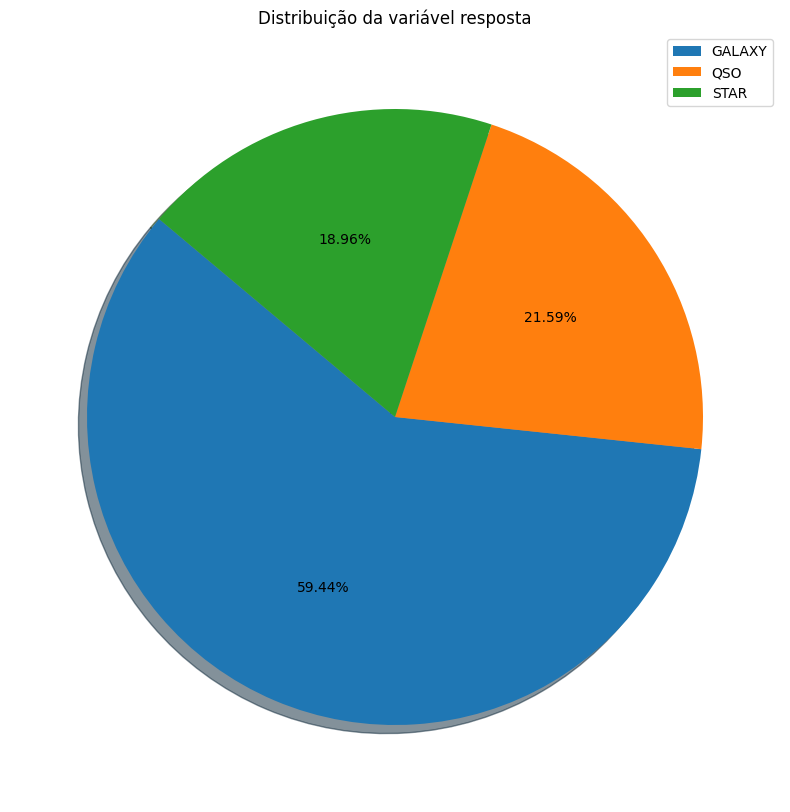

In [23]:
# Define o tamanho da figura do gráfico (10x10 polegadas)
plt.figure(figsize=(10,10))

# O explode destaca a segunda fatia (0.1), enquanto a primeira fatia não é destacada (0).
# Isso pode ser usado para dar mais destaque a uma das categorias.
explode = [0, 0.1]

# Cria o gráfico de pizza (pie chart)
# df['target'].value_counts() conta as ocorrências de cada valor na coluna 'target'
# explode define o destaque das fatias
# autopct='%1.2f%%' exibe as porcentagens das fatias no gráfico com 2 casas decimais
# shadow=True adiciona uma sombra ao gráfico para dar um efeito tridimensional
# startangle=140 define o ângulo de início do gráfico, em graus (140 graus gira o gráfico para que a primeira fatia fique na parte superior)
plt.pie(df_treino['target'].value_counts(), autopct='%1.2f%%', shadow=True, startangle=140)

# Adiciona uma legenda ao gráfico com os rótulos para cada categoria (Adimplente e Inadimplente)
plt.legend(labels=['GALAXY', 'QSO', 'STAR'])

# Define o título do gráfico
plt.title('Distribuição da variável resposta')


In [24]:
df_proj = df.copy()

In [25]:
target_map = {'GALAXY': 0, 'STAR': 1, 'QSO': 2}
df_proj['target'] = df_proj['target'].map(target_map)

In [26]:
corr_matrix = df_proj.corr()
corr_matrix["target"].sort_values(ascending=False)

target         1.000000
redshift       0.536822
i              0.284396
plate          0.215722
spec_obj_ID    0.215722
MJD            0.207262
r              0.150691
delta          0.056643
fiber_ID       0.032053
z              0.017352
cam_col        0.014476
alpha          0.004552
obj_ID        -0.000047
run_ID        -0.000049
g             -0.005915
u             -0.017701
field_ID      -0.038044
rerun_ID            NaN
Name: target, dtype: float64

In [27]:
df_proj['target'].value_counts()


target
0    59445
1    21594
2    18961
Name: count, dtype: int64

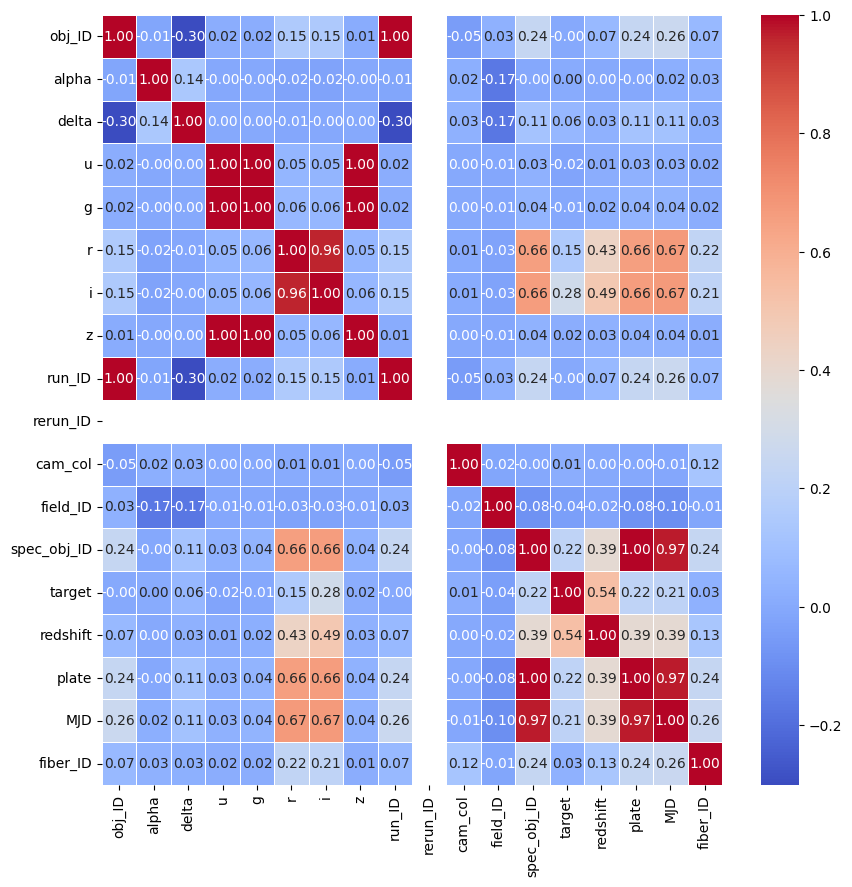

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_proj.corr(), annot = True, fmt = ".2f", linewidths = .5, cmap='coolwarm')
plt.show()

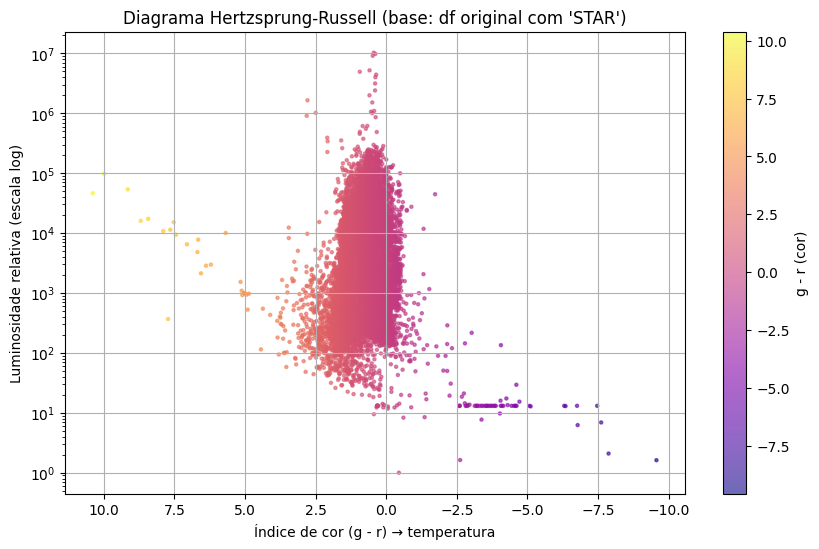

In [29]:
# 1. Selecionar estrelas com base na coluna 'target' como string
stars = df[df['target'] == 'STAR'].copy()

# 2. Garantir dados válidos
stars = stars.dropna(subset=['g', 'r'])
stars = stars[(stars['g'] > 10) & (stars['g'] < 30)]
stars = stars[(stars['r'] > 10) & (stars['r'] < 30)]

# 3. Calcular índice de cor (temperatura inversa) e luminosidade relativa
stars['color_index'] = stars['g'] - stars['r']
stars['luminosity'] = 10 ** ((-stars['r'] + stars['r'].max()) / 2.5)

# 4. Plotar o HR diagram
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    stars['color_index'],
    stars['luminosity'],
    s=5,
    alpha=0.6,
    c=stars['color_index'],
    cmap='plasma'
)
plt.yscale('log')
plt.gca().invert_xaxis()
plt.title("Diagrama Hertzsprung-Russell (base: df original com 'STAR')")
plt.xlabel("Índice de cor (g - r) → temperatura")
plt.ylabel("Luminosidade relativa (escala log)")
plt.colorbar(scatter, label='g - r (cor)')
plt.grid(True)
plt.show()


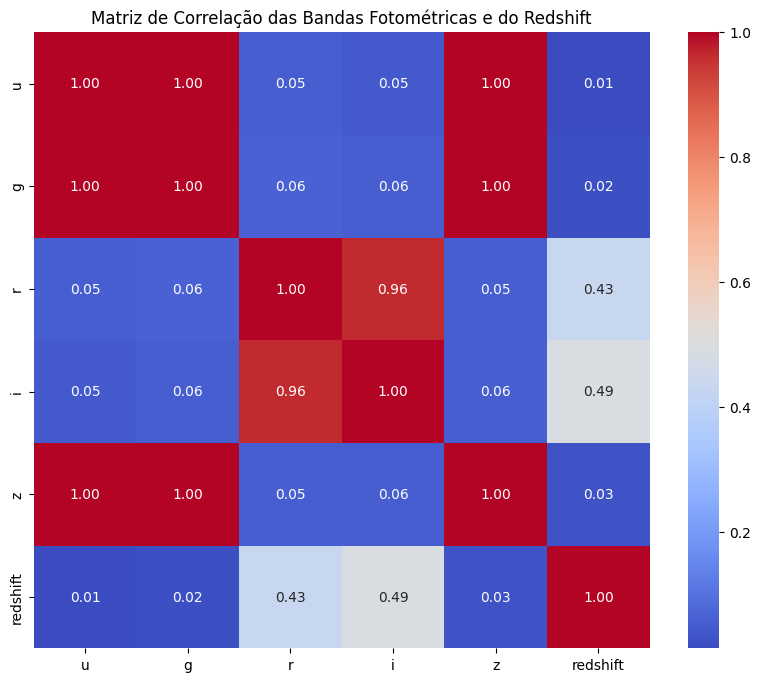

In [30]:
plt.figure(figsize=(10, 8))
corr = df[['u', 'g', 'r', 'i', 'z', 'redshift']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação das Bandas Fotométricas e do Redshift')
plt.show()

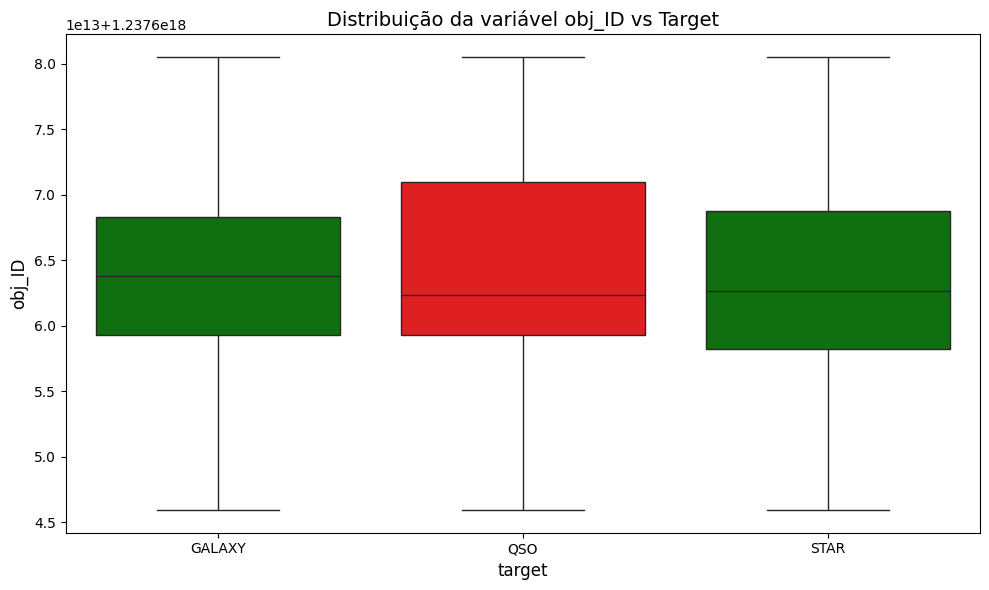

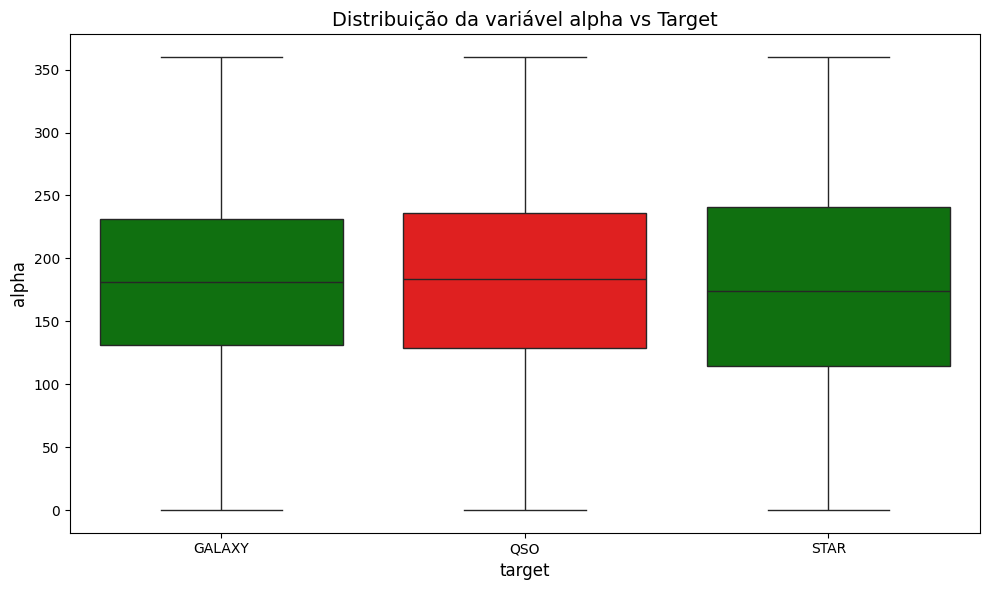

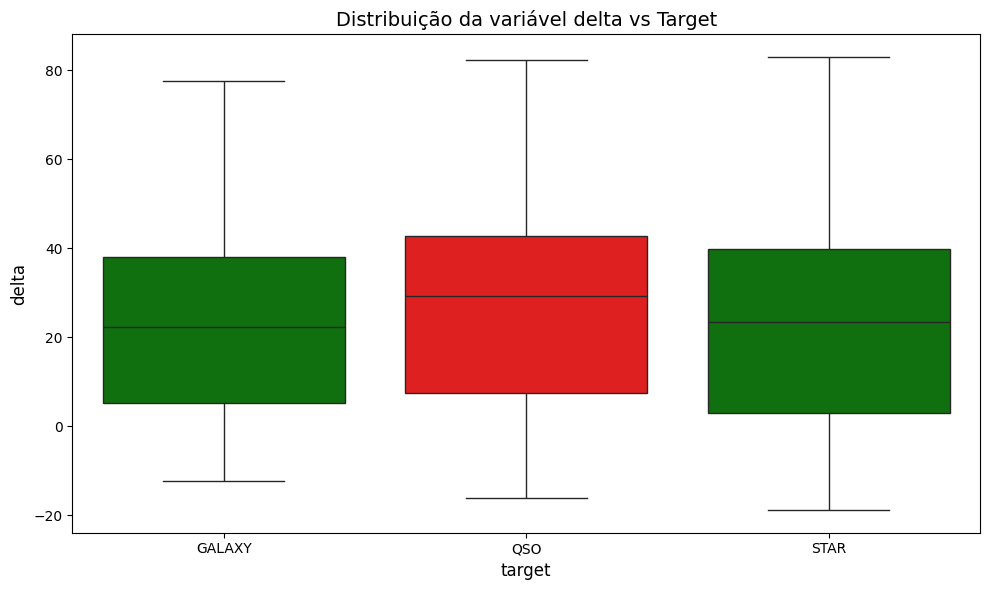

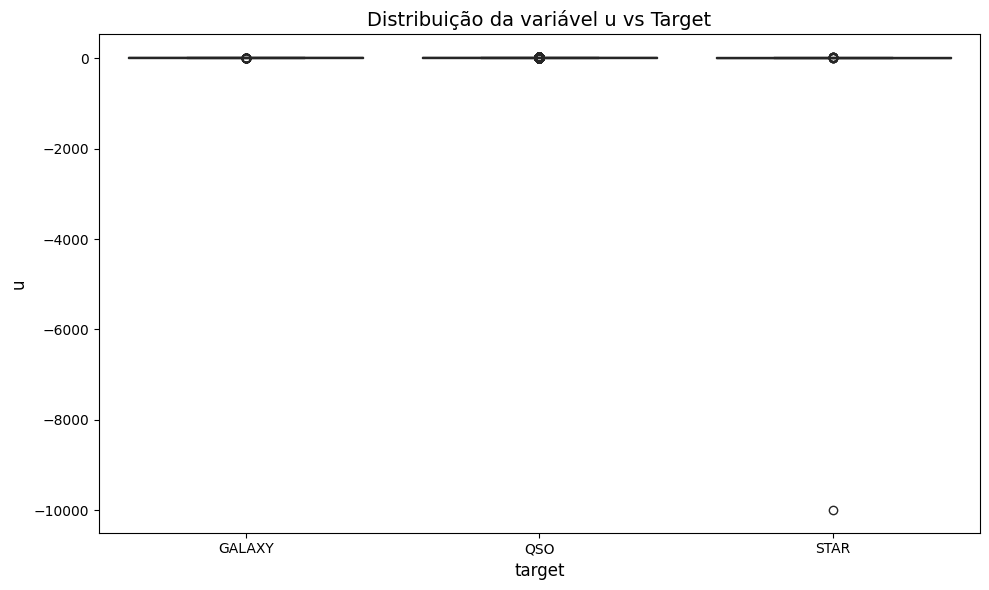

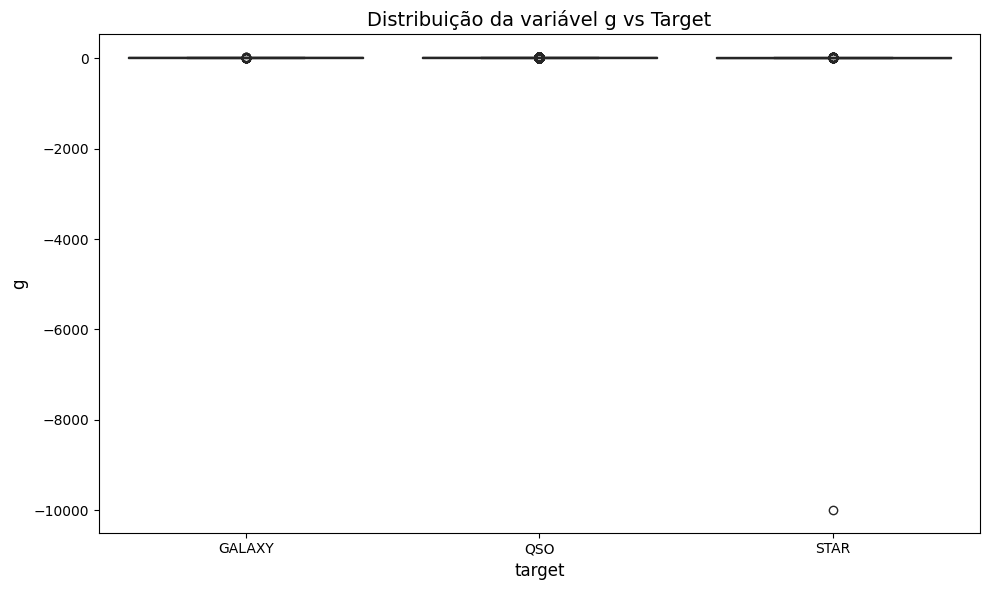

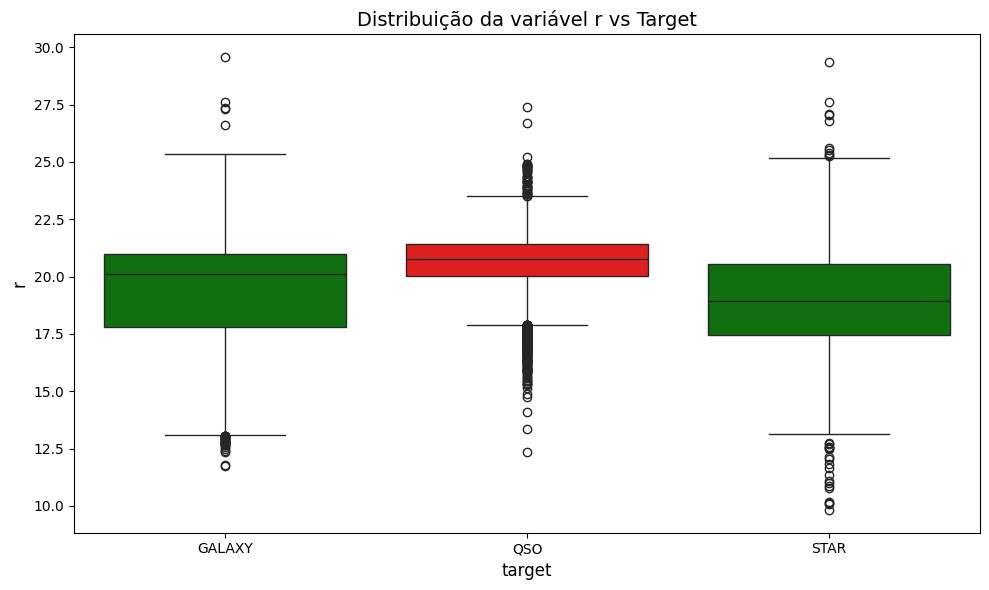

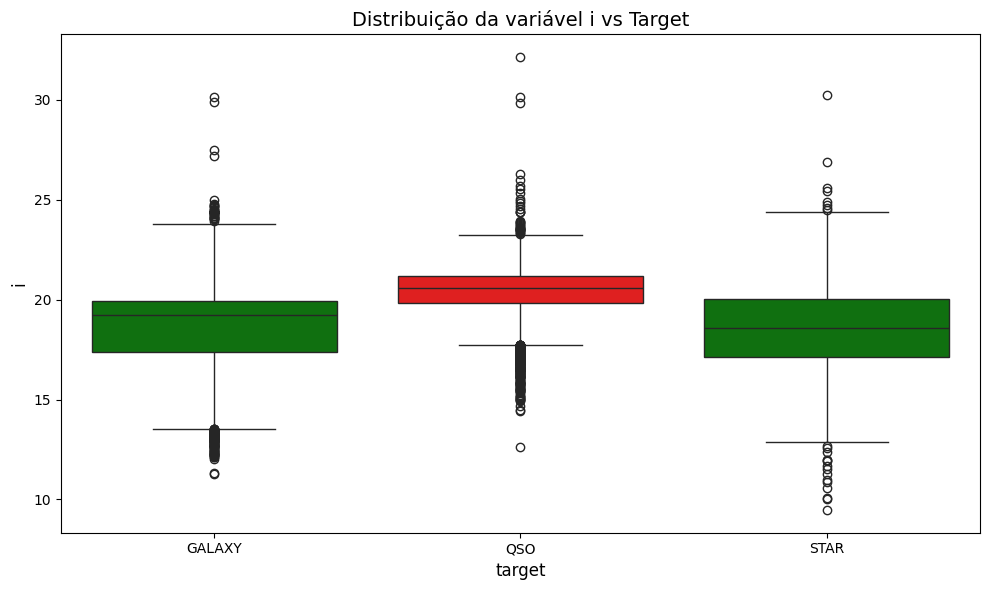

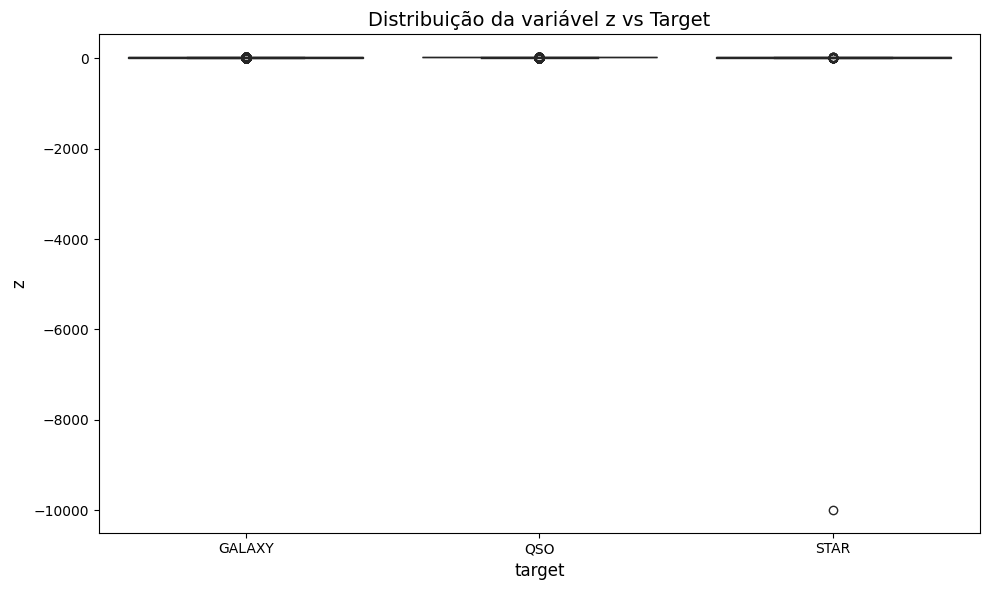

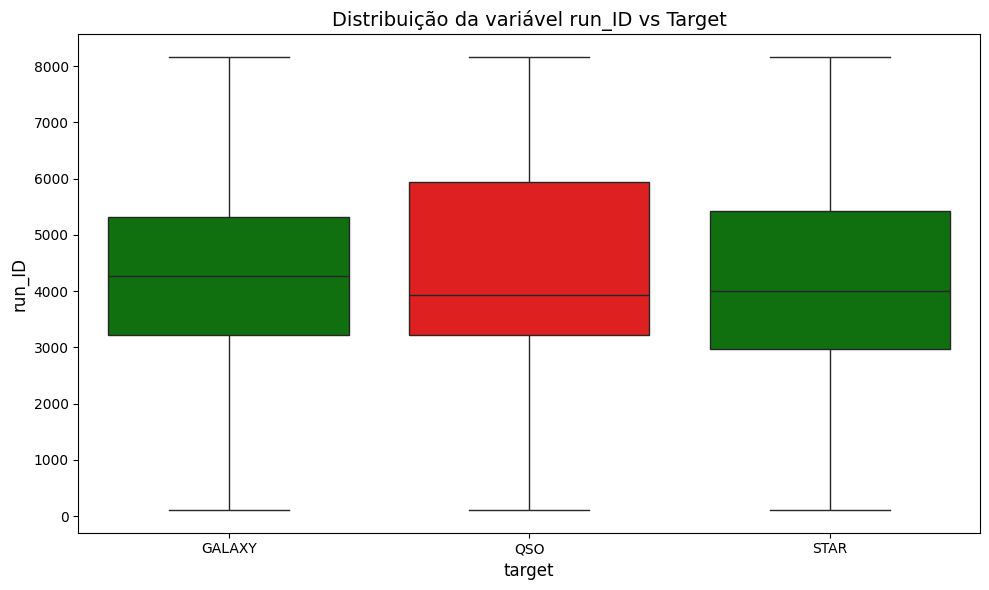

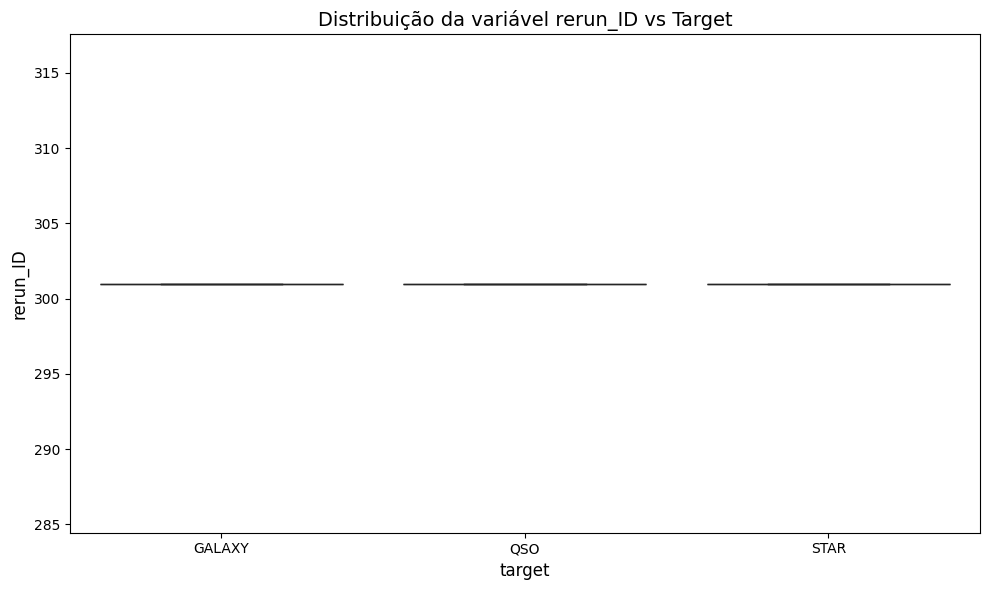

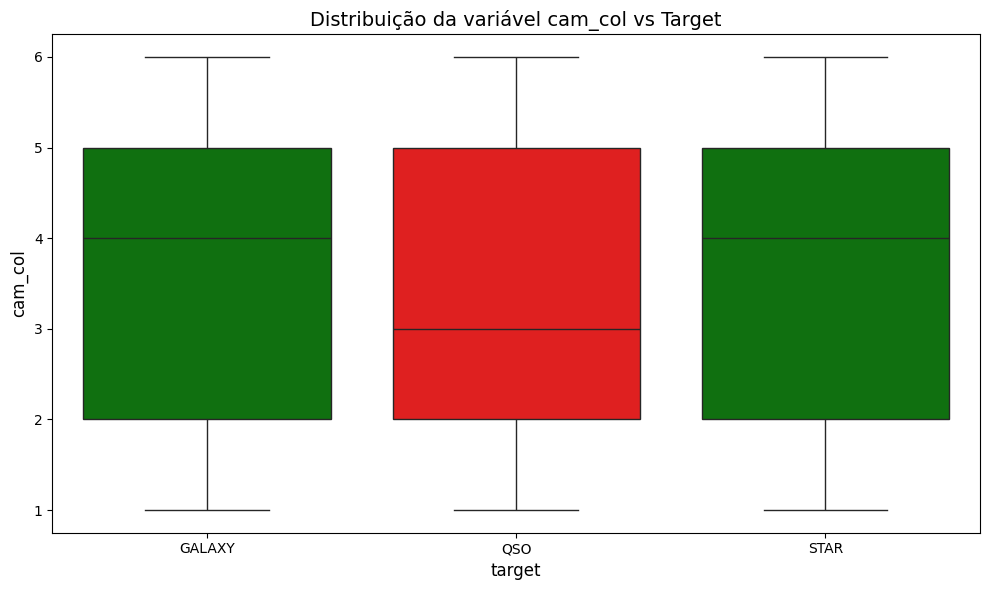

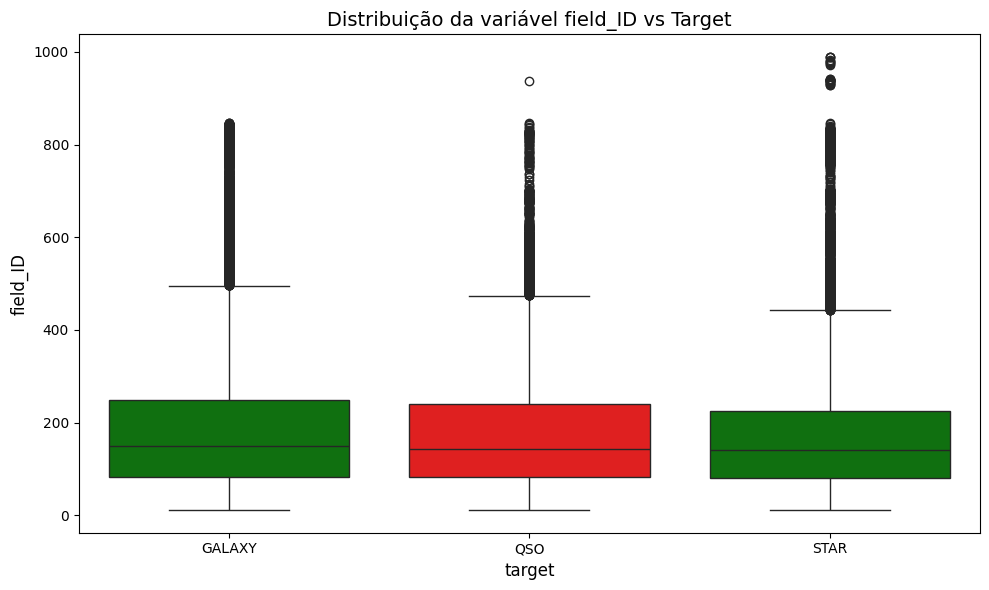

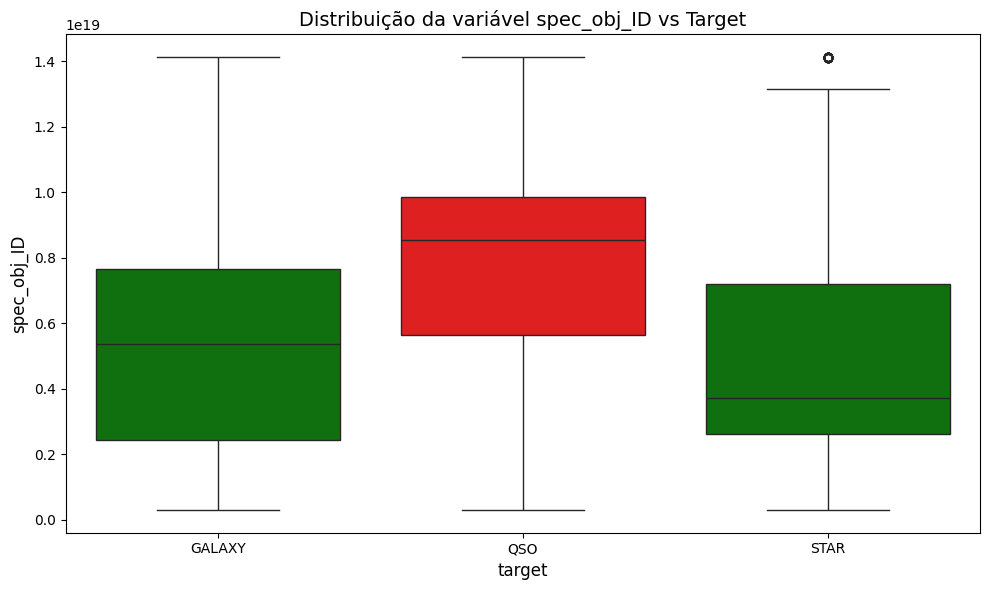

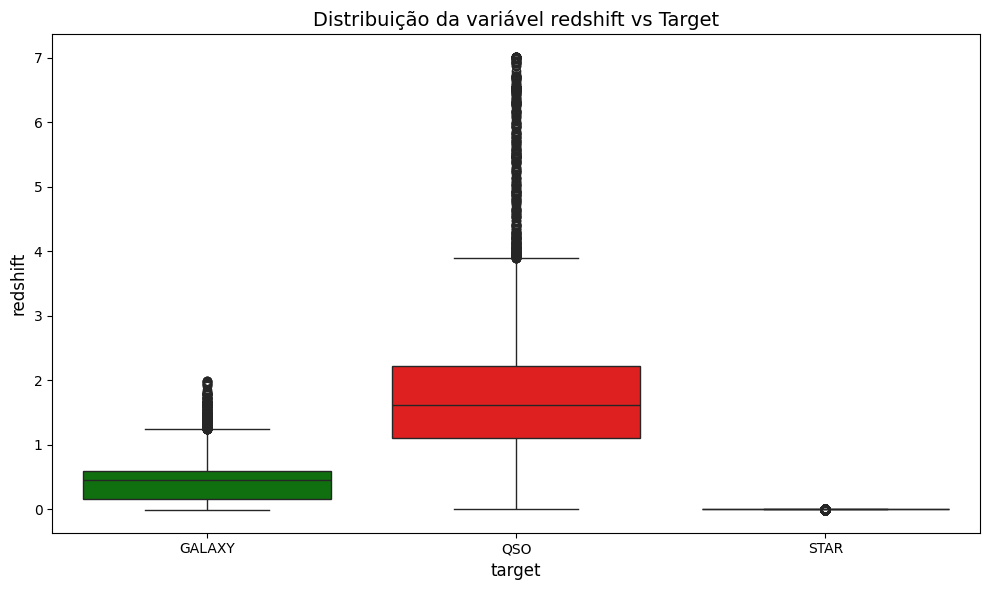

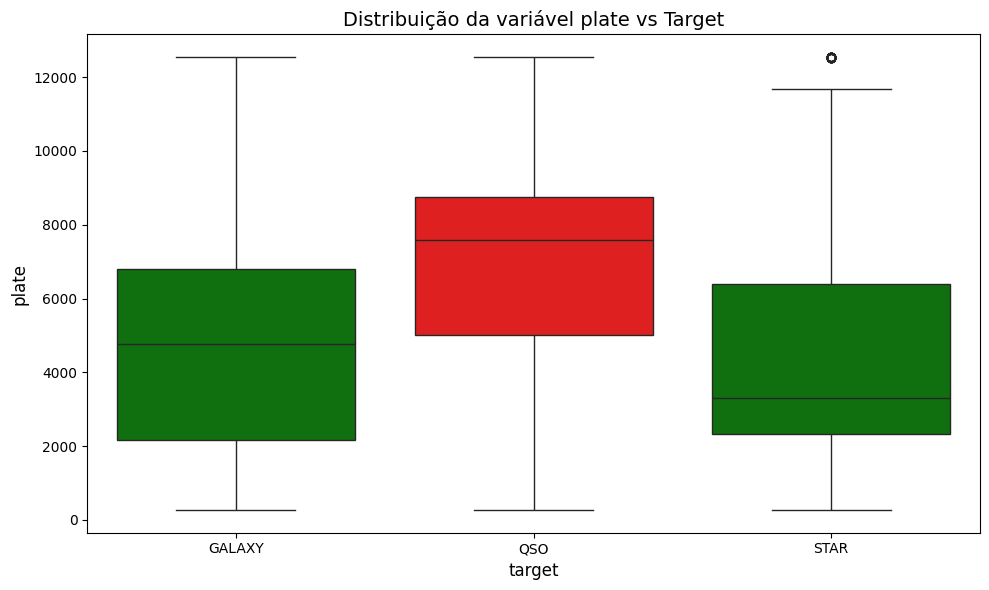

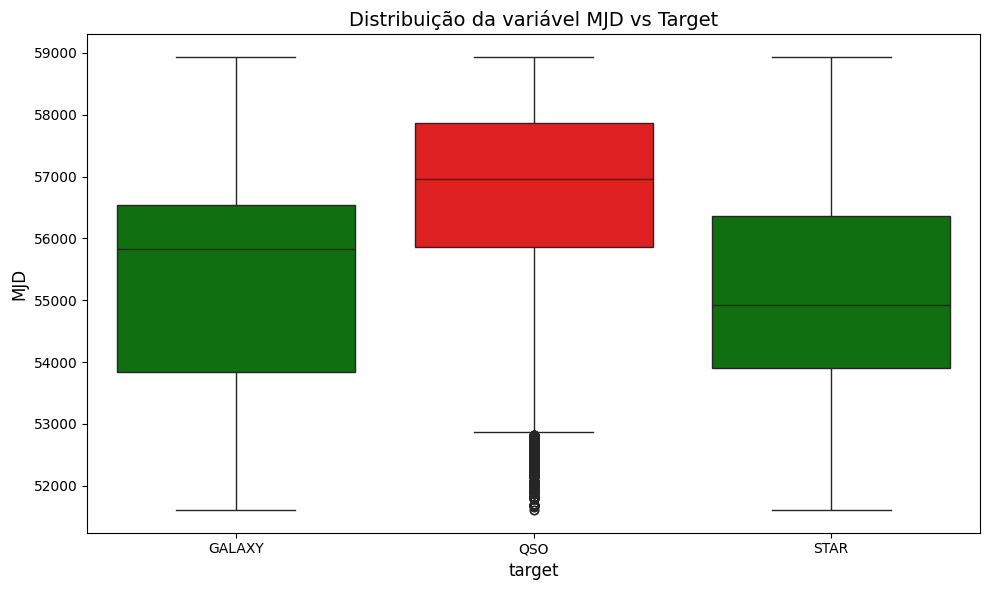

In [31]:
for num_var in num_vars:  # num_vars é a lista de variáveis numéricas
    plt.figure(figsize=(10, 6))

    # Definir uma paleta customizada com as cores verde e vermelho
    custom_palette = ['green', 'red']  # Verde para 'Adimplente' e vermelho para 'Inadimplente'

    # Criar o boxplot com as cores ajustadas
    sns.boxplot(x='target', y=num_var, data=df, palette=custom_palette)

    # Títulos e rótulos do gráfico
    plt.title(f'Distribuição da variável {num_var} vs Target', fontsize=14)
    plt.xlabel('target', fontsize=12)
    plt.ylabel(num_var, fontsize=12)

    # Ajuste no layout para evitar sobreposição
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()

In [32]:
def plot_dist(dataframe):

    for col in dataframe.columns:
        if col != '' and col !='class':
            sns.histplot(data=df, x=col, kde=True)
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()

In [33]:
#plot_dist(df)

## insights gerados pela matriz de correlação



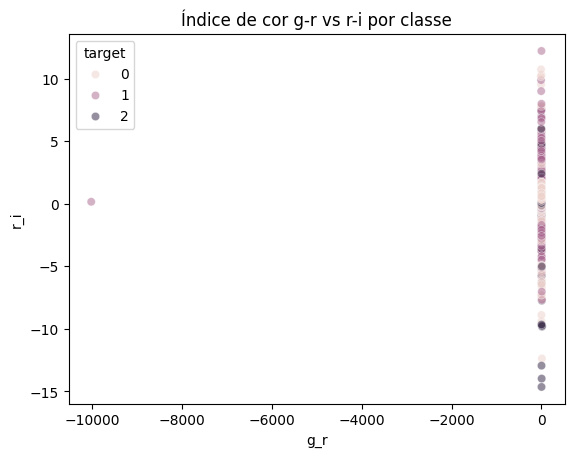

In [34]:
df_proj['g_r'] = df_proj['g'] - df_proj['r']
df_proj['r_i'] = df_proj['r'] - df_proj['i']

# Scatterplot colorido por classe
sns.scatterplot(data=df_proj, x='g_r', y='r_i', hue='target', alpha=0.5)
plt.title('Índice de cor g-r vs r-i por classe')
plt.show()


<Axes: >

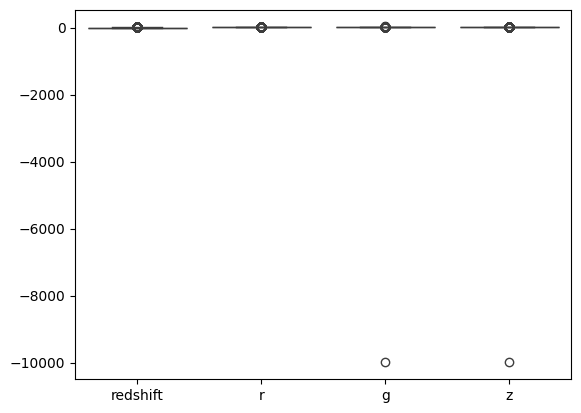

In [35]:
sns.boxplot(data=df[['redshift', 'r', 'g', 'z']])


# Outliers
- possuimos nesse dataset diversos outliers em diferentes colunas, seria eficiente ultilizar bilioteca `LocalOutlierFactor` para localizarmos e nos desfazermos da mesma

## por que fazer o train split antes?
aplicar a detecção de outliers somente nos dados de treino (X_train) evita que seu modelo "aprenda" com o que ele deveria estar prevendo — ou seja, evita data leakage.

In [36]:
# Aplica LOF só no treino
clf = LocalOutlierFactor()
y_pred_train = clf.fit_predict(X_train)  # -1 = outlier, 1 = inlier
x_score = clf.negative_outlier_factor_

# Converte para DataFrame
outlier_score = pd.DataFrame({'score': x_score}, index=X_train.index)

# Define threshold (ajustável)
threshold = -1.5
outliers = outlier_score[outlier_score['score'] < threshold].index

# Remove outliers do treino
X_train_clean = X_train.drop(index=outliers)
y_train_clean = y_train.drop(index=outliers)


<Axes: >

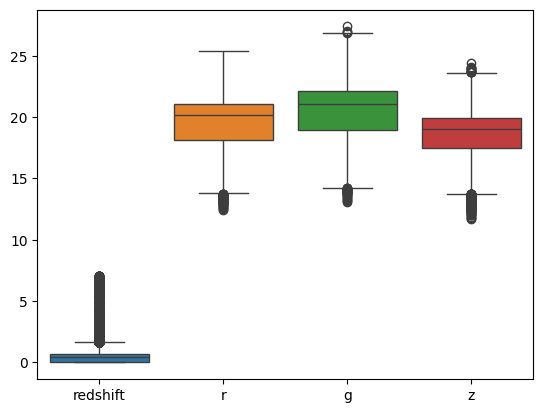

In [37]:
sns.boxplot(data=X_train_clean[['redshift', 'r', 'g', 'z']])

In [38]:
print(y_train_clean.value_counts())


target
GALAXY    40642
STAR      14280
QSO       12842
Name: count, dtype: int64


In [39]:
print( 'Número de atributos do dataset de treino tratado: {}'.format( X_train_clean.shape[1] ) )

Número de atributos do dataset de treino tratado: 6


é notavel a distribuição desbalanceada dentro do dataset. é recomendavel fazer um balanceamento apartir da biblioteca SMOTE

Distribuição antes do SMOTE: Counter({'GALAXY': 40642, 'STAR': 14280, 'QSO': 12842})
Distribuição após SMOTE: Counter({'GALAXY': 40642, 'STAR': 40642, 'QSO': 40642})


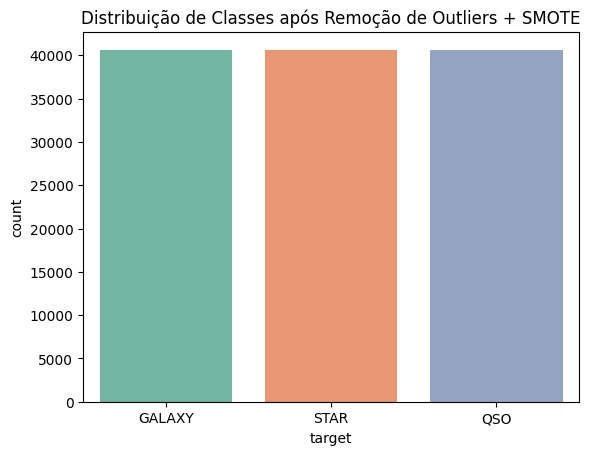

In [40]:
# 1. Aplica SMOTE após remoção dos outliers
print("Distribuição antes do SMOTE:", Counter(y_train_clean))
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_clean, y_train_clean)
print("Distribuição após SMOTE:", Counter(y_train_bal))

# 2. Visualiza distribuição balanceada
sns.countplot(x=y_train_bal, palette="Set2")
plt.title("Distribuição de Classes após Remoção de Outliers + SMOTE")
plt.show()

## por que nao ultilizar scaler
- a ultilização do scaler pode acabar atrapalhando em algumas variaveis, variaveis de cálculos baseados em distância.
- o modelo random forest não é obrigatorio tal tratamento pois não é sensivel a esse estilo de tratamento

# modelo randon forest

Relatório de classificação:
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     17834
         QSO       0.94      0.94      0.94      5688
        STAR       1.00      1.00      1.00      6478

    accuracy                           0.98     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000



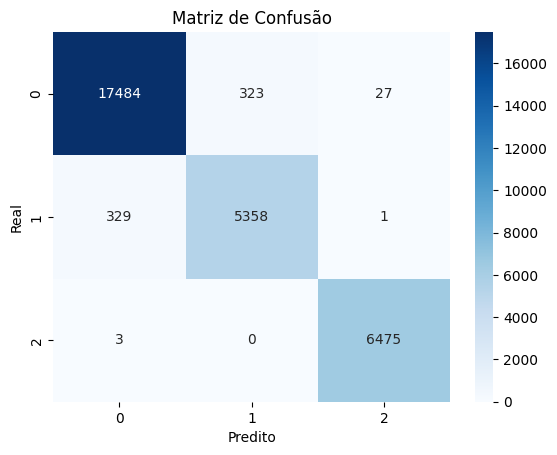

In [41]:
# 3. Treina modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# 4. Avalia no conjunto de teste
y_pred = rf.predict(X_test)

print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

- teste do treinamento porem nao feito apartir do balanceamento para testar overfeeting

In [42]:
print(X_train_clean.columns)


Index(['u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')


## testes feitos sem balanceamento

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     17834
           1       1.00      1.00      1.00      6478
           2       0.96      0.93      0.94      5688

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000



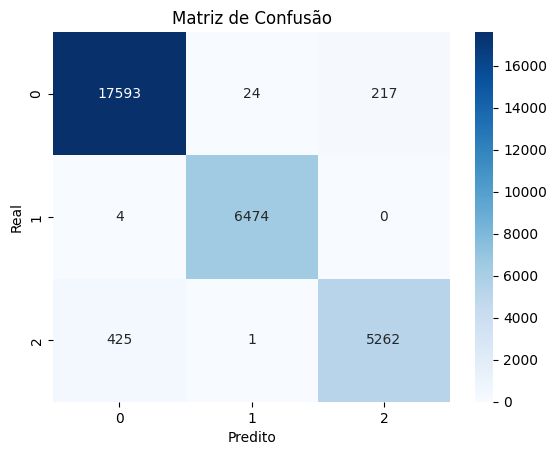

In [43]:
# 1. Mapeia as classes em y_train_clean e y_test
target_label = {'GALAXY': 0, 'STAR': 1, 'QSO': 2}

y_train_clean = y_train_clean.replace(target_label)
y_test = y_test.replace(target_label)

# 2. Treina o modelo com os dados limpos
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_clean, y_train_clean)

# 3. Avalia no conjunto de teste
y_pred = rf.predict(X_test)

# 4. Relatório e matriz de confusão
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


## validação cruzada

In [44]:
scores = cross_val_score(rf, X_train_clean, y_train_clean, cv=5, scoring='f1_macro')
print(f"F1-macro médio: {scores.mean():.4f}")


F1-macro médio: 0.9757


📊 Avaliação no Conjunto de Teste
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     17834
           1       1.00      1.00      1.00      6478
           2       0.96      0.93      0.94      5688

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000



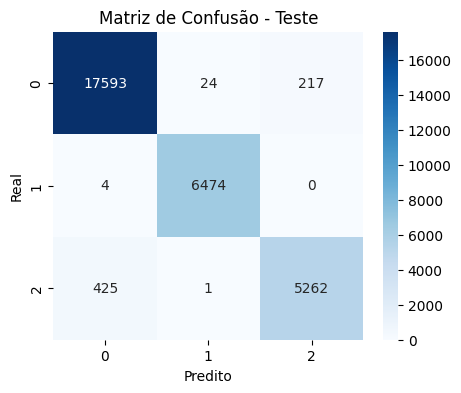


📊 Avaliação no Conjunto de Treinamento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40642
           1       1.00      1.00      1.00     14280
           2       1.00      1.00      1.00     12842

    accuracy                           1.00     67764
   macro avg       1.00      1.00      1.00     67764
weighted avg       1.00      1.00      1.00     67764



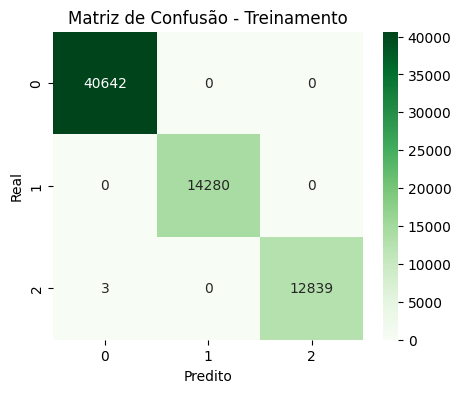

In [45]:
# 1. Mapeamento das classes
target_label = {'GALAXY': 0, 'STAR': 1, 'QSO': 2}
y_train_clean = y_train_clean.replace(target_label)
y_test = y_test.replace(target_label)

# 2. Treinamento do modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_clean, y_train_clean)

# ======== AVALIAÇÃO NO TESTE ========
y_pred_test = rf.predict(X_test)

print("📊 Avaliação no Conjunto de Teste")
print(classification_report(y_test, y_pred_test))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Teste")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# ======== AVALIAÇÃO NO TREINO ========
y_pred_train = rf.predict(X_train_clean)

print("\n📊 Avaliação no Conjunto de Treinamento")
print(classification_report(y_train_clean, y_pred_train))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_train_clean, y_pred_train), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Treinamento")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


## observações apos rodar o modelo
- altissimas precisão quanto a medições de quasares, talvez alta de mais.
- investigar essa precisão atraves de Curva ROC

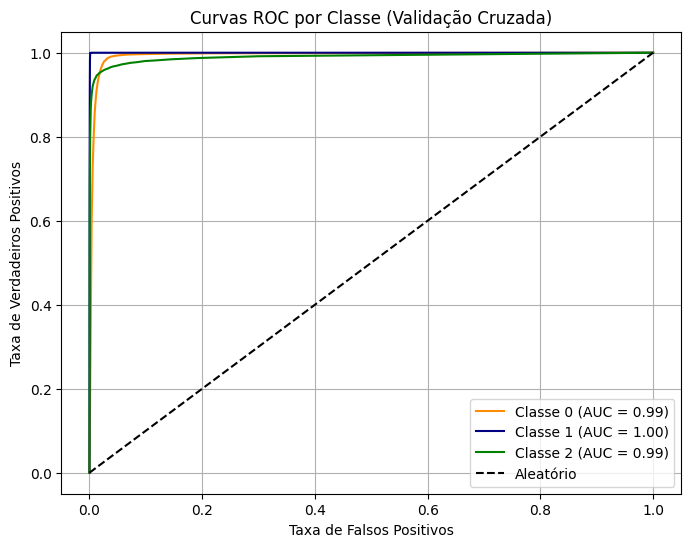

In [46]:

# 1. Prever as probabilidades com validação cruzada
y_prob_cv = cross_val_predict(
    rf, X_train_clean, y_train_clean,
    cv=5, method='predict_proba'
)

# 2. Binariza os rótulos reais
classes = [0, 1, 2]
y_bin_cv = label_binarize(y_train_clean, classes=classes)
n_classes = y_bin_cv.shape[1]

# 3. Calcula fpr, tpr e AUC para cada classe
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin_cv[:, i], y_prob_cv[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Plot da Curva ROC
colors = cycle(['darkorange', 'navy', 'green'])
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Classe {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC por Classe (Validação Cruzada)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


tentando entender essa tendencia tao grande para a acuracia de quasares

In [47]:
# 1. Importância das variáveis a partir do modelo RandomForest já treinado
feature_importance = rf.feature_importances_

# 2. Cria DataFrame com nome das colunas de X_train_clean e suas importâncias
importance_df = pd.DataFrame({
    'feature': X_train_clean.columns,
    'importance': feature_importance
})

# 3. Ordena em ordem decrescente
importance_df = importance_df.sort_values('importance', ascending=False)

# 4. Exibe
print(importance_df)

    feature  importance
5  redshift    0.642245
4         z    0.104688
1         g    0.071433
0         u    0.070331
3         i    0.068588
2         r    0.042714


O que está acontecendo no Modelo:
✅ Estrelas (STAR):
Estrelas estão próximas da Terra, ou seja, possuem redshift muito baixo ou quase zero.

Isso faz com que nenhuma galáxia ou quasar "invada" a faixa de redshift das estrelas.

Resultado: o modelo nunca se confunde com estrela → acurácia quase perfeita para a classe STAR.

❗ Galáxias vs. Quasares:
Ambas podem ter redshift alto — mas com faixas que se sobrepõem parcialmente.

O modelo tenta decidir entre elas com base nas sutis diferenças nas magnitudes espectrais e nos detalhes do redshift.

Isso gera confusões entre GALAXY e QSO, e explica por que:

F1 de STAR é ~1.00

F1 de GALAXY e QSO são menores (~0.97 ou menos)

explicação da discrepancia de acuracia
- uma visualização focada para demonstrar isso

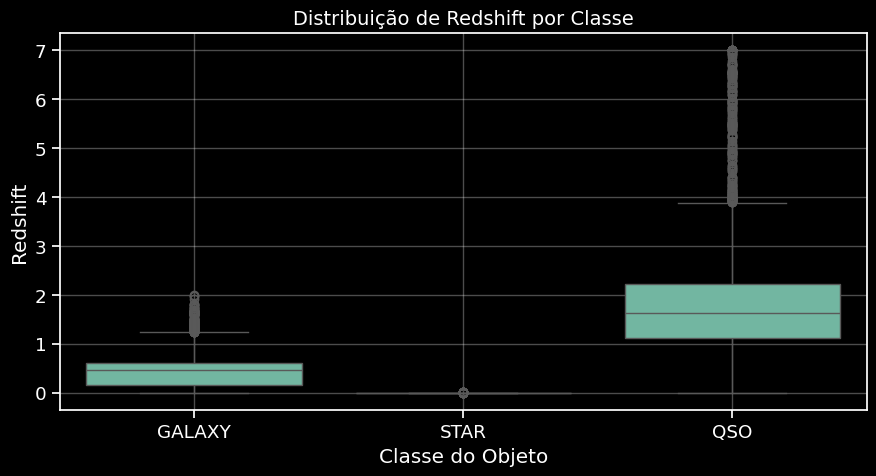

In [48]:
# Ativa fundo escuro
plt.style.use('dark_background')
sns.set_palette('Set2')
sns.set_context('notebook', font_scale=1.2)

# Mapeia rótulos se ainda estiverem em números
class_map = {0: 'GALAXY', 1: 'STAR', 2: 'QSO'}
df_redshift = X_train_clean.copy()
df_redshift['target'] = y_train_clean.map(class_map)

# Cria o gráfico
plt.figure(figsize=(9, 5))
sns.boxplot(data=df_redshift, x='target', y='redshift')

plt.title('Distribuição de Redshift por Classe', fontsize=14)
plt.xlabel('Classe do Objeto')
plt.ylabel('Redshift')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Implementação do modelo!
- testar implementações de dados apatir de dados reais

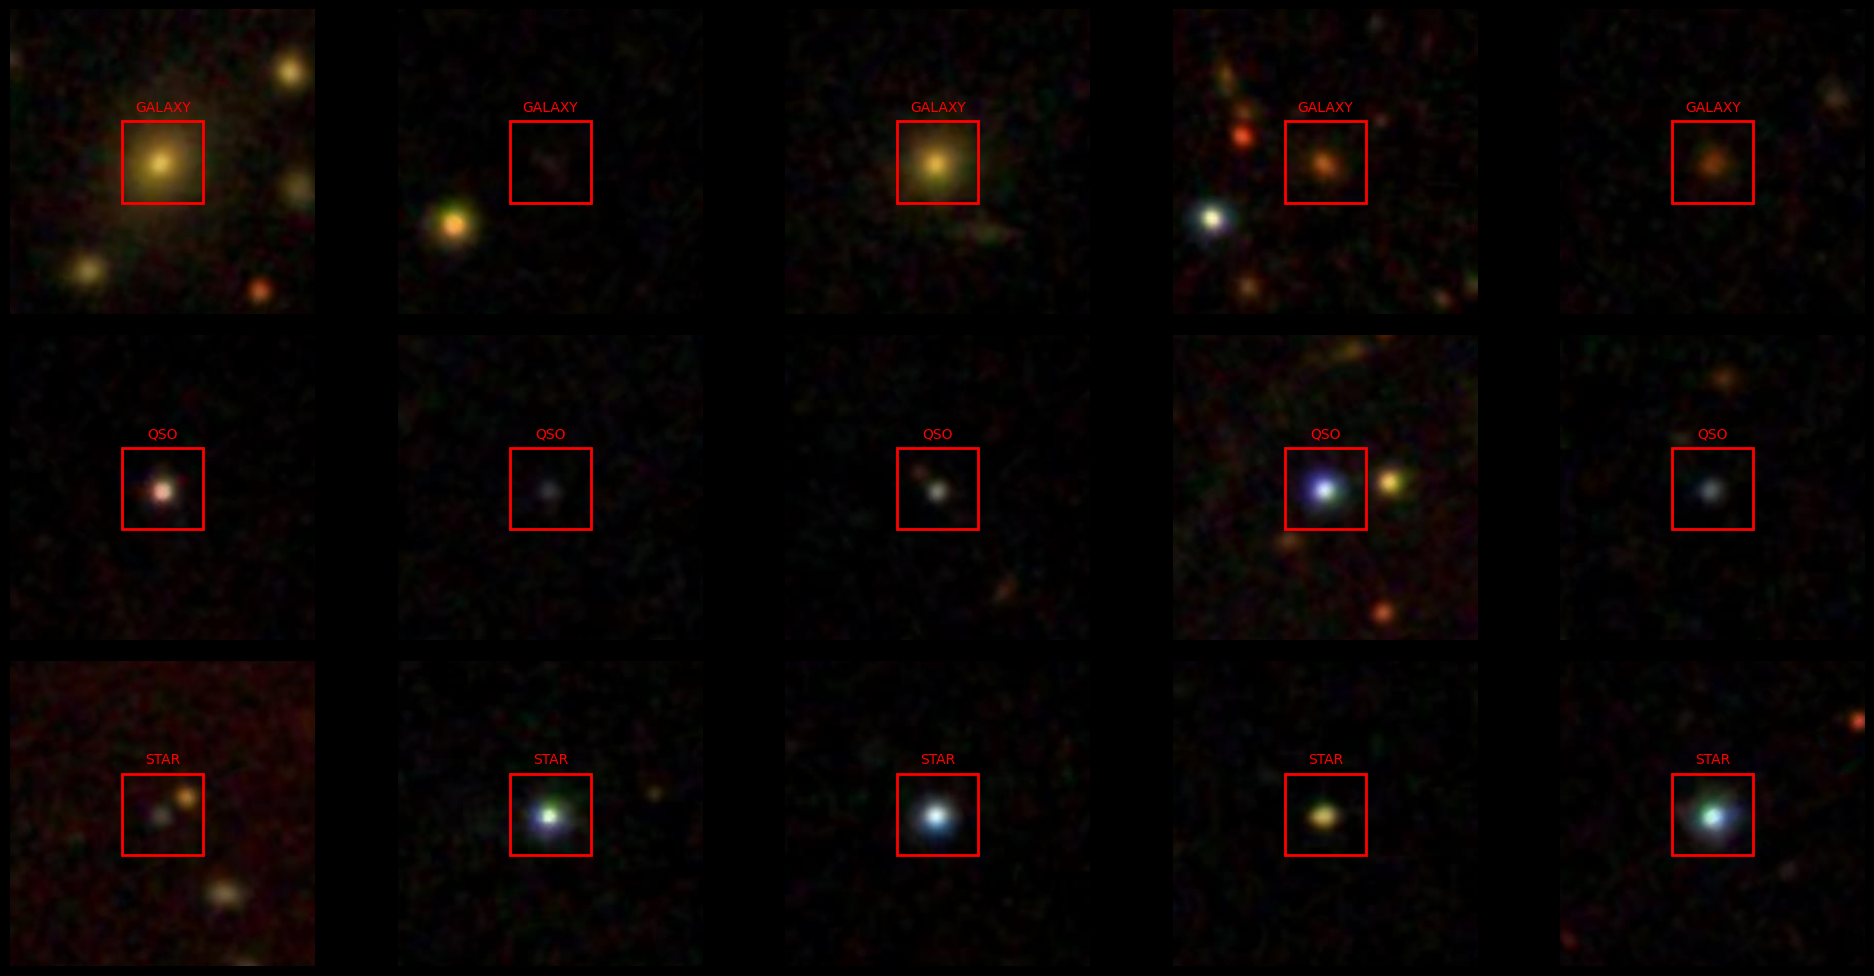

In [49]:
# Mapeamento reverso para o nome das classes
target_label = {0: 'GALAXY', 1: 'STAR', 2: 'QSO'}

# (OU) se você ainda tiver a coluna 'class':
classes = df['target'].unique()

# Parâmetros da imagem
scale = 0.1
width = 300
height = 300

fig, axes = plt.subplots(nrows=len(classes), ncols=5, figsize=(20, 10))

for i, cls in enumerate(classes):
    subset = df[df['target'] == cls]
    subset = subset.sample(n=min(5, len(subset)), random_state=42)

    for j, (_, row) in enumerate(subset.iterrows()):
        ra = row['alpha']
        dec = row['delta']

        url = f"http://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?ra={ra}&dec={dec}&scale={scale}&width={width}&height={height}"

        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            axes[i, j].imshow(img)

            box_size = 80
            rect = plt.Rectangle((width/2 - box_size/2, height/2 - box_size/2), box_size, box_size,
                                 edgecolor='red', facecolor='none', linewidth=2)
            axes[i, j].add_patch(rect)

            axes[i, j].text(width/2, height/2 - box_size/2 - 10, cls, color='red', fontsize=10, ha='center')
            axes[i, j].axis('off')
        except Exception as e:
            print(f"Erro ao buscar imagem: RA={ra}, DEC={dec} -> {e}")
            axes[i, j].text(0.5, 0.5, 'No Image', ha='center')
            axes[i, j].axis('off')

    axes[i, 0].set_ylabel(cls, rotation=0, labelpad=20, fontsize=12)

plt.tight_layout()
plt.show()


In [50]:
linha_real = X_test.iloc[[50]]  # linha em formato DataFrame
classe_predita = rf.predict(linha_real)[0]


print(f"🔭 Objeto da linha 0 foi classificado como: *{classe_predita}*")



🔭 Objeto da linha 0 foi classificado como: *0*


# aplicação do modelo
- aplicamos nosso modelo para

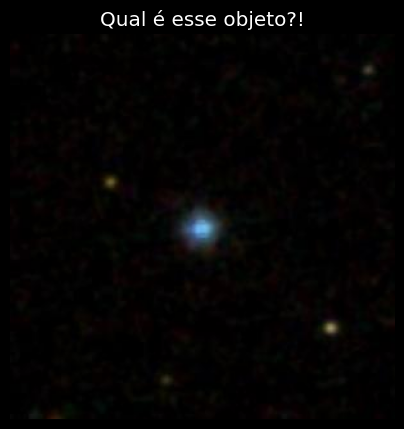

In [51]:
# Variáveis globais
ultima_linha = None
colunas_treinadas = X_train_bal.columns

# Botões
botao_novo = widgets.Button(description="🔁 Nova Amostra")
botao_revelar = widgets.Button(description="🔍 Revelar Classificação")

# Container de widgets
container = widgets.HBox([botao_novo, botao_revelar])

def mostrar_imagem(_=None):
    global ultima_linha
    clear_output(wait=True)
    display(container)

    # Sorteia uma nova linha
    linha = df.sample(n=1, random_state=None).iloc[0]
    ultima_linha = linha  # salva para uso posterior

    ra = linha['alpha']
    dec = linha['delta']
    url = f"http://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?ra={ra}&dec={dec}&scale=0.2&width=300&height=300"

    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title("Qual é esse objeto?!")
        plt.show()
    except Exception as e:
        print("Erro ao buscar imagem:", e)

def revelar_classificacao(_=None):
    if ultima_linha is not None:
        X_input = pd.DataFrame([ultima_linha[colunas_treinadas]])
        pred = rf.predict(X_input)[0]
        real = ultima_linha['target']
        ra = ultima_linha['alpha']
        dec = ultima_linha['delta']

        print(f"🔭 Classe Real: {real} | 🎯 Predito: {pred}")
        print(f"RA: {ra:.2f} | DEC: {dec:.2f}")
        print(f"Magnitude u: {ultima_linha['u']:.2f}")
        print(f"Magnitude g: {ultima_linha['g']:.2f}")
        print(f"Magnitude r: {ultima_linha['r']:.2f}")
        print(f"Magnitude i: {ultima_linha['i']:.2f}")
        print(f"Magnitude z: {ultima_linha['z']:.2f}")
        print(f"Redshift: {ultima_linha['redshift']:.4f}")
    else:
        print("Nenhuma imagem foi carregada ainda.")

# Ligações dos botões
botao_novo.on_click(mostrar_imagem)
botao_revelar.on_click(revelar_classificacao)

# Inicia a interface
mostrar_imagem()


## ✅ Conclusão

Este projeto teve como objetivo aplicar técnicas de aprendizado de máquina para classificar objetos astronômicos (galáxias, estrelas e quasares) a partir de suas características espectrais e físicas, utilizando dados reais do Sloan Digital Sky Survey (SDSS).

---

### 📌 Principais Resultados:

- Após o pré-processamento (remoção de outliers, balanceamento de classes e filtragem de variáveis técnicas), o modelo de **Random Forest** alcançou **excelente desempenho**, com **F1-macro acima de 0.97** em validação cruzada.
- A análise das **variáveis mais importantes** evidenciou que as magnitudes nos filtros `u`, `g`, `r`, `i`, `z` e o `redshift` foram determinantes para a correta distinção entre os tipos de objetos.
- Foi possível validar visualmente as predições por meio da ferramenta **SpaceDex**, que conecta diretamente a ciência de dados com observações reais do céu, tornando o modelo mais interpretável e educativo.

---

### 🚀 Reflexão Final:

Este projeto mostrou como a astronomia e o machine learning podem caminhar juntos para extrair valor científico de grandes volumes de dados observacionais. Além da construção de um modelo robusto, buscamos **explorar, visualizar e compreender melhor o universo**, conectando números, espectros e imagens celestes de maneira interativa.

---

> 🌌 A jornada de explorar o cosmos por meio de dados está apenas começando — e modelos como este são passos importantes para novas descobertas e aplicações em pesquisa científica, educação e exploração espacial.
